In [1]:
# including the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Importing the data
# I preprossed the data in matlab so in the current csv file there is no Nan or Inf entries
# Also we have 50% data with label 0(unreliable) and 50% with 1(reliable)
data = pd.read_csv('/home/sur/catkin_ws/src/d435_characterization/rosbag/all_cases_covered/concat.csv')
data.columns = ['Distance', 'StdDev', 'noOfNan', 'label']
data = shuffle(data)
data.head()

,Distance,StdDev,noOfNan,label
15054,2.5498,0.007093,6,1
17600,2.4521,0.042233,2,0
4022,2.5213,0.015841,0,1
29866,2.6287,0.012810,0,1
9346,2.5252,0.016050,0,1


In [3]:
# Data Visualization
data.describe()

,Distance,StdDev,noOfNan,label
count,31615.000000,31615.000000,31615.00000,31615.000000
mean,2.530509,0.014473,3.00563,0.498086
std,0.097155,0.009461,4.40635,0.500004
min,2.166200,0.000496,0.00000,0.000000
25%,2.484800,0.008432,0.00000,0.000000
50%,2.542600,0.011811,0.00000,0.000000
75%,2.592900,0.017722,5.00000,1.000000
max,2.787300,0.078798,21.00000,1.000000


In [4]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Distance,StdDev,noOfNan,label
Distance,1.000000,-0.259901,0.052429,0.058346
StdDev,-0.259901,1.000000,-0.090870,0.043701
noOfNan,0.052429,-0.090870,1.000000,-0.547461
label,0.058346,0.043701,-0.547461,1.000000


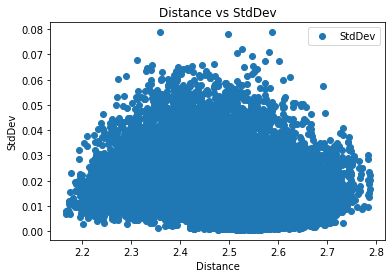

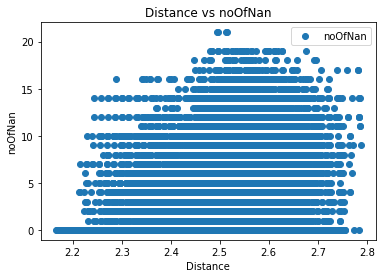

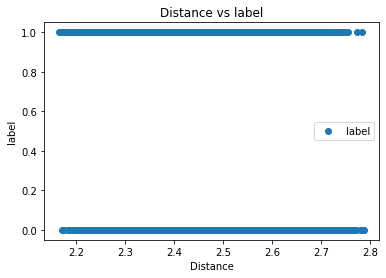

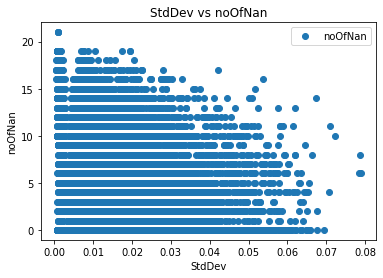

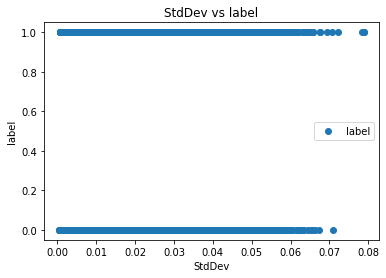

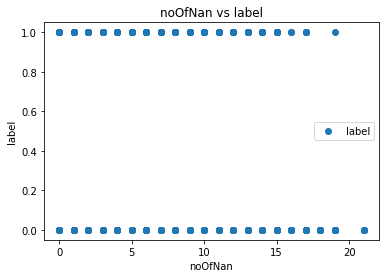

In [5]:
# PLotting following graph for visualization of correlation between features and showing the generalisation of dataset
data.plot(x='Distance', y='StdDev', style='o')  
plt.title('Distance vs StdDev')  
plt.xlabel('Distance')  
plt.ylabel('StdDev')  
plt.show()

data.plot(x='Distance', y='noOfNan', style='o')  
plt.title('Distance vs noOfNan')  
plt.xlabel('Distance')  
plt.ylabel('noOfNan')  
plt.show()

data.plot(x='Distance', y='label', style='o')  
plt.title('Distance vs label')  
plt.xlabel('Distance')  
plt.ylabel('label')  
plt.show()

data.plot(x='StdDev', y='noOfNan', style='o')  
plt.title('StdDev vs noOfNan')  
plt.xlabel('StdDev')  
plt.ylabel('noOfNan')  
plt.show()

data.plot(x='StdDev', y='label', style='o')  
plt.title('StdDev vs label')  
plt.xlabel('StdDev')  
plt.ylabel('label')  
plt.show()

data.plot(x='noOfNan', y='label', style='o')  
plt.title('noOfNan vs label')  
plt.xlabel('noOfNan')  
plt.ylabel('label')  
plt.show()

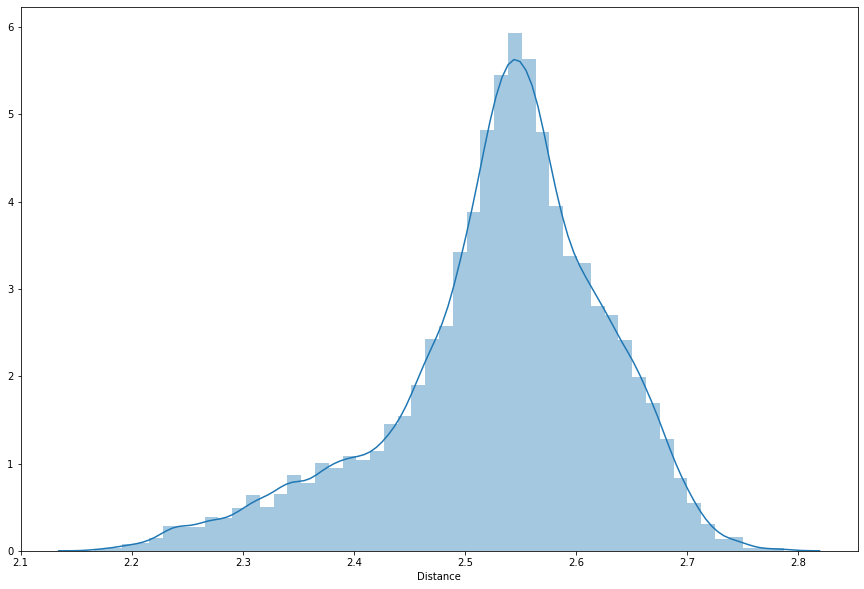

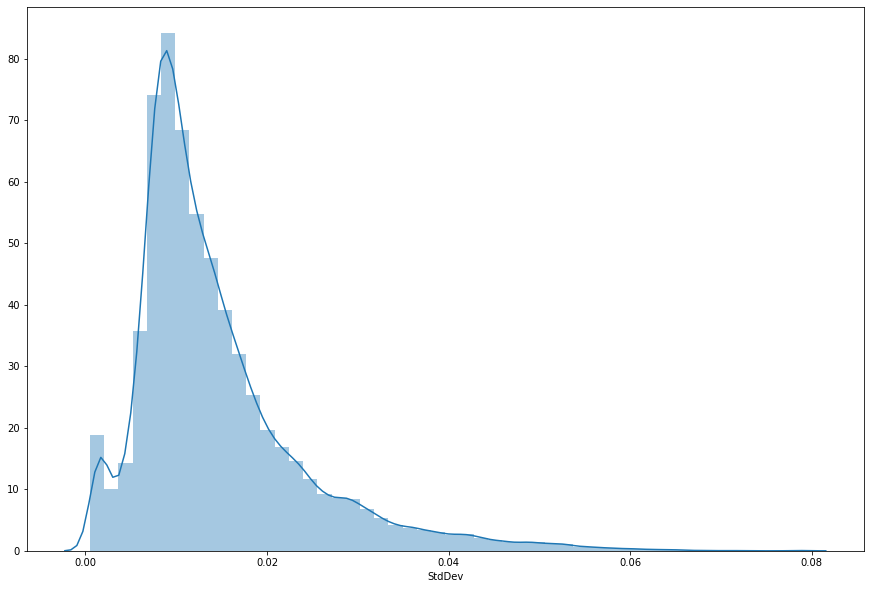

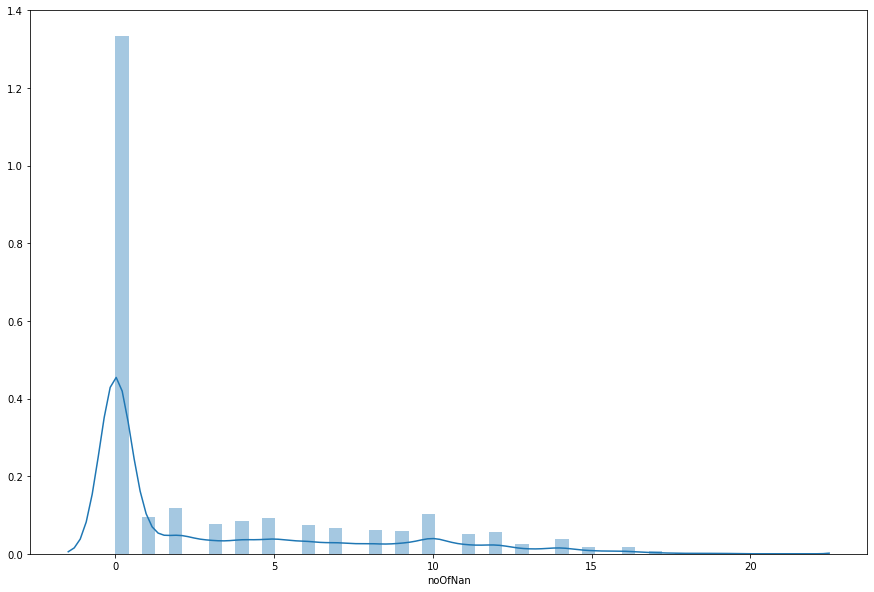

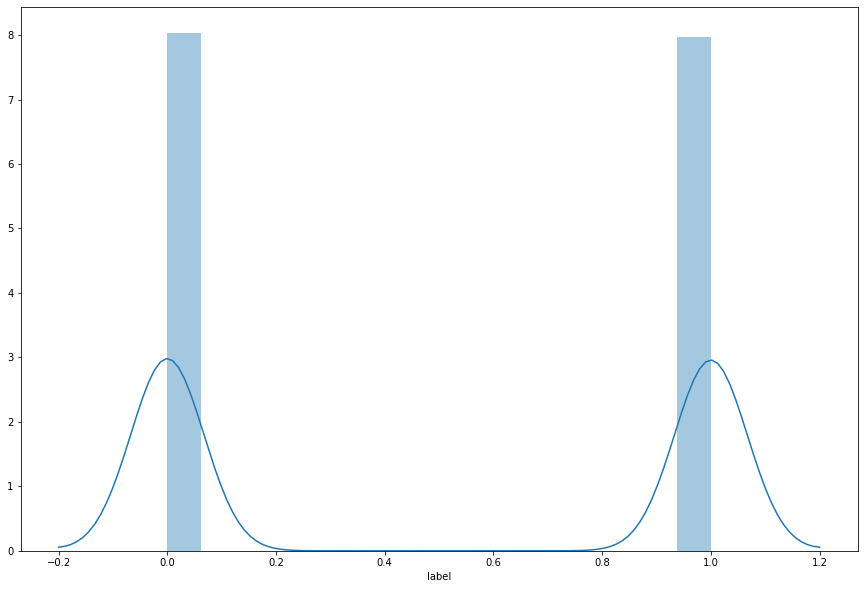

In [6]:
# Distribution of features
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Distance'])

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['StdDev'])

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['noOfNan'])

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['label'])

In [7]:
# Preparing the data for the model
features = data.drop('label', 1)
labels = data['label']
features.head()

,Distance,StdDev,noOfNan
15054,2.5498,0.007093,6
17600,2.4521,0.042233,2
4022,2.5213,0.015841,0
29866,2.6287,0.012810,0
9346,2.5252,0.016050,0


In [8]:
labels.head()

15054    1
17600    0
4022     1
29866    1
9346     1
Name: label, dtype: int64

In [9]:
# Test train split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23711, 3)
(7904, 3)
(23711,)
(7904,)


In [10]:
# Linear Regression model
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
coeff_df = pd.DataFrame(regressor.coef_,)  
coeff_df = pd.DataFrame(regressor.coef_, x_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Distance,0.487309
StdDev,1.161342
noOfNan,-0.062180


In [12]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
24180,0,0.322987
25603,0,0.573634
30625,1,0.746578
26945,1,0.583863
15518,1,0.700630
10421,0,0.650794
14016,0,0.401147
1443,0,0.053209
5768,1,0.674754
21465,0,0.122316


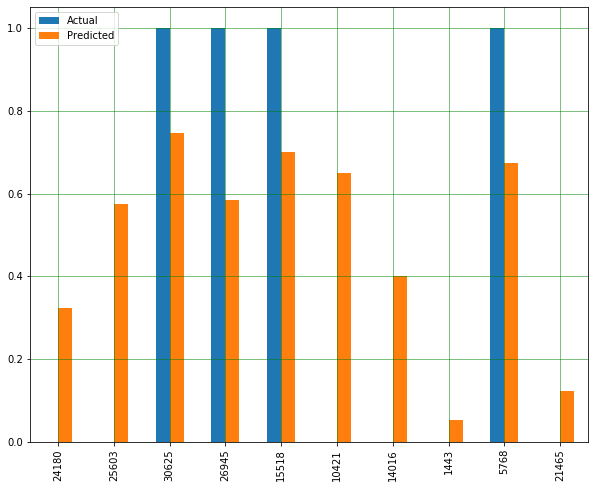

In [13]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.36775897485504344
Mean Squared Error: 0.171113144922932
Root Mean Squared Error: 0.413658246530795


In [15]:
# Logistic Regression model
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
logisticRegr.predict(x_test[0:10])


24180    0
25603    0
30625    1
26945    1
15518    1
10421    0
14016    0
1443     0
5768     1
21465    0
Name: label, dtype: int64


In [20]:
print(y_test[0:10])

24180    0
25603    0
30625    1
26945    1
15518    1
10421    0
14016    0
1443     0
5768     1
21465    0
Name: label, dtype: int64


In [17]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7742914979757085


In [18]:
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2587 1412]
 [ 372 3533]]


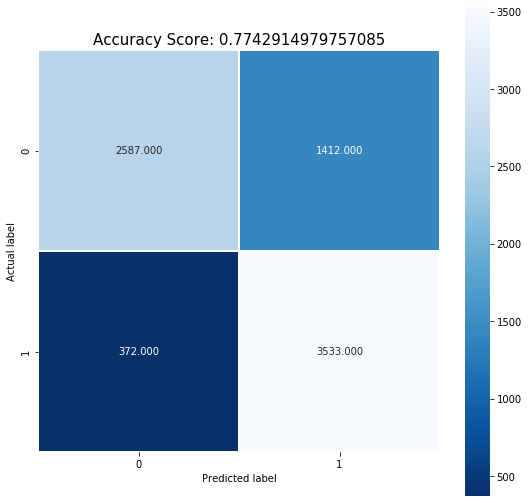

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);